# **<span style="color: crimson;">TRABAJO GRUPAL 3 - SERENDIPIA**

### **<span style="color: turquoise;">Parte 1: Revisión y análisis exploratorio de datos**

### **<span style="color: orange;">1.-** Antes de proceder con el modelado, es esencial realizar un análisis exploratorio de datos (EDA). A continuación, cargamos el dataset en nuestro entorno de trabajo


In [1]:
import pandas as pd
import numpy as np

# Establecemos el URL del Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Leemos el archivo de datos 
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Combinamos los datos y determinamos nuestra variable objetivo ("PRICE": precio medio de las viviendas):
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame(data, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])

df["PRICE"] = target

# Mostramos las primeras filas del DataFrame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### **<span style="color: orange;">2.-** Una vez cargado el dataset, realice el análisis exploratorio de datos, incluyendo cálculos y gráficos, y comente sobre sus observaciones. Aborde los siguientes puntos:

#### a. Utilice **<span style="color: yellow;"> df.describe()** y **<span style="color: yellow;"> df.info()** para obtener un resumen estadístico y una descripción general del dataset. Comente sobre los resultados.

In [2]:
# Primero, obtenemos un resumen estadístico:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### Ahora, comentamos los resultados de la tabla de resumen estadísticos: 

##### *<span style="color: red;">∴* CRIM: La media de la tasa de criminalidad por persona es de 3.613524, con una desviación estándar de 8.601545. El valor mínimo es 0.00632 y el valor máximo es 88.9762. La mediana es 0.25651, lo que indica que la mitad de las observaciones tienen una tasa de criminalidad menor o igual a esta. La distribución de la variable es sesgada a la derecha, lo que significa que hay algunos valores atípicamente altos.
##### *<span style="color: red;">∴* ZN: La media de la proporción de terreno residencial dividida en lotes superiores a 25.000 pies cuadrados es de 11.363636, con una separación estándar de 23.322453. El valor mínimo es 0.000 y el valor máximo es 100.000. La mediana es 0.000, lo que indica que la mitad de las observaciones tienen una proporción de terreno residencial menor o igual a esta. La distribución de la variable es sesgada a la derecha, lo que significa que hay algunos valores atípicamente altos.
##### *<span style="color: red;">∴* INDUS: La media de la proporción de acres comerciales no minoristas por ciudad es de 11.136779, con una desviación estándar de 6.860353. El valor mínimo es 0.460 y el valor máximo es 27.740. La mediana es 1.000, lo que indica que la mitad de las observaciones tienen una proporción de acres comerciales no minoristas menor o igual a esta. La variable muestra una distribución aproximadamente normal, lo que indica que la mayoría de las observaciones tienen una proporción de acres de negocios moderada.
##### *<span style="color: red;">∴* CHAS: La media de la variable ficticia que indica la proximidad al río Charles es de 0.069170, con una desviación estándar de 0.253994. El valor mínimo es 0.000 y el valor máximo es 9.690. La mediana es 0.000, lo que indica que la mitad de las observaciones no están cerca del río Charles. La distribución de la variable es sesgada a la izquierda, lo que significa que hay algunos valores atípicamente bajos; es decir, muestra que la mayoría de las observaciones no tienen viviendas cerca del río Charles.
##### *<span style="color: red;">∴* NOX: La media de la concentración de óxidos de nitrógeno (partes por millón) es de 0.554695, con una desviación estándar de 0.115878. El valor mínimo es 0.38500 y el valor máximo es 0.8710. La mediana es 0.53800, lo que indica que la mitad de las observaciones tienen una concentración de óxidos de nitrógeno menor o igual a esta. La distribución de la variable es casi normal.
##### *<span style="color: red;">∴* RM: La media del número promedio de habitaciones por vivienda es de 6.284634, con una desviación estándar de 0.702617. El valor mínimo es 3.56100 y el valor máximo es 8.7800. La mediana es 6.20850, lo que indica que la mitad de las observaciones tienen un número promedio de habitaciones menores o igual a esta. La distribución de la variable es normal.
##### *<span style="color: red;">∴* AGE: La media de la proporción de unidades ocupadas por propietarios construidas antes de 1940 es de 68.574901, con una desviación estándar de 28.1488661. El valor mínimo es 2.900 y el valor máximo es 100.000. La mediana es 77.500, lo que indica una amplia variabilidad en la antigüedad de las viviendas, con muchas áreas teniendo un alto porcentaje de viviendas antiguas.
##### *<span style="color: red;">∴* DIS: La media de la distancia ponderada a cinco centros de empleo en Boston es de 3.795043, con una desviación estándar de 2.105710. El valor mínimo es 1.1296 y el valor máximo es 12.1265. La mediana es 3.207450, lo que indica que las distancias a los centros de empleo varían significativamente, con un rango de 1.13 a 12.13.
##### *<span style="color: red;">∴* RAD: La media del índice de accesibilidad a carreteras radiales es de 9.549407, con una desviación estándar de 8.707259. El valor mínimo es 1.000 y el valor máximo es 24.000. La mediana es 5.000, lo que indica este índice también muestra una alta variabilidad, indicando diferentes niveles de accesibilidad a las carreteras.
##### *<span style="color: red;">∴* TAX: La media de la tasa de impuesto a la propiedad por cada $10,000 es de 408.237154, con una desviación estándar de 168.537116. El valor mínimo es 187.000 y el valor máximo es 711.000. La mediana es 330.000, lo que indica que las tasas de impuestos a la propiedad varían ampliamente, reflejando diferentes políticas fiscales locales.
##### *<span style="color: red;">∴* PTRATIO: La media del índice alumno-maestro por ciudades es de 18.455534, con una desviación estándar de 2.164946. El valor mínimo es 12.600 y el valor máximo es 22.000. La mediana es 19.050, lo que sugiere diferencias en los recursos educativos entre áreas.
##### *<span style="color: red;">∴* B: La media de proporción de residentes de raza afroamericana por ciudad es de 356.674032, con una desviación estándar de 91.294864. El valor mínimo es 0.320 y el valor máximo es 396.900. La mediana es 391.440, lo que indica que muchas áreas tienen una proporción similar de residentes afroamericanos.
##### *<span style="color: red;">∴* LSTAT: La media del porcentaje de población con bajo estatus socioeconómico es de 12.653063, con una desviación estándar de 7.141062. El valor mínimo es 1.730 y el valor máximo es 37.970. La mediana es 11.360, lo que indica que la proporción de población con bajo estatus socioeconómico varía considerablemente.
##### *<span style="color: red;">∴* PRICE: La media del precio medio de las viviendas ocupadas por sus propietarios (en miles de dólares) es de 22.532806, con una desviación estándar de 9.197104. El valor mínimo es 5.000 y el valor máximo es 50.000. La mediana es 21.200, lo que indica que la variable objetivo PRICE tiene una distribución más normal, ya que la media y la mediana son bastante similares.

#### Por último, comentamos los resultados de la descripción general del dataset:

In [3]:
# Segundo, obtenemos una descripción general del dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##### *<span style="color: red;">∴* Notamos que en una primera inspección, el dataset no tiene valores nulos y que las variables son de tipo numérica.

#### b. Identifique valores faltantes utilizando **<span style="color: yellow;">df.isnull().sum()**. Comente sobre cualquier valor faltante y el tratamiento que se aplicará.

In [4]:
# Identificamos los valores faltantes: 
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Después de utilizar el código, observamos que no hay valores faltantes en ninguna de las variables. Sin embargo, al analizar los datos, notamos que la variable ZN exhibe una distribución sesgada hacia la izquierda, lo que sugiere la posible presencia de valores nulos. Decidimos no aplicar ningún tratamiento adicional, debido a que al cambiar los valores nulos con la media o la mediana, observamos una alta presencia de outliers en el diagrama de caja (boxplot). Esto indicaría que los valores imputados podrían no estar debidamente representados. Por lo tanto, para realizar la parte 3 del trabajo, conservaremos la variable ZN sin modificar sus valores nulos y, así, evitar complicaciones adicionales.

#### c. Visualice la distribución de las variables continuas mediante histogramas y los recuentos de frecuencias para las variables discretas. Comente sobre las distribuciones observadas.

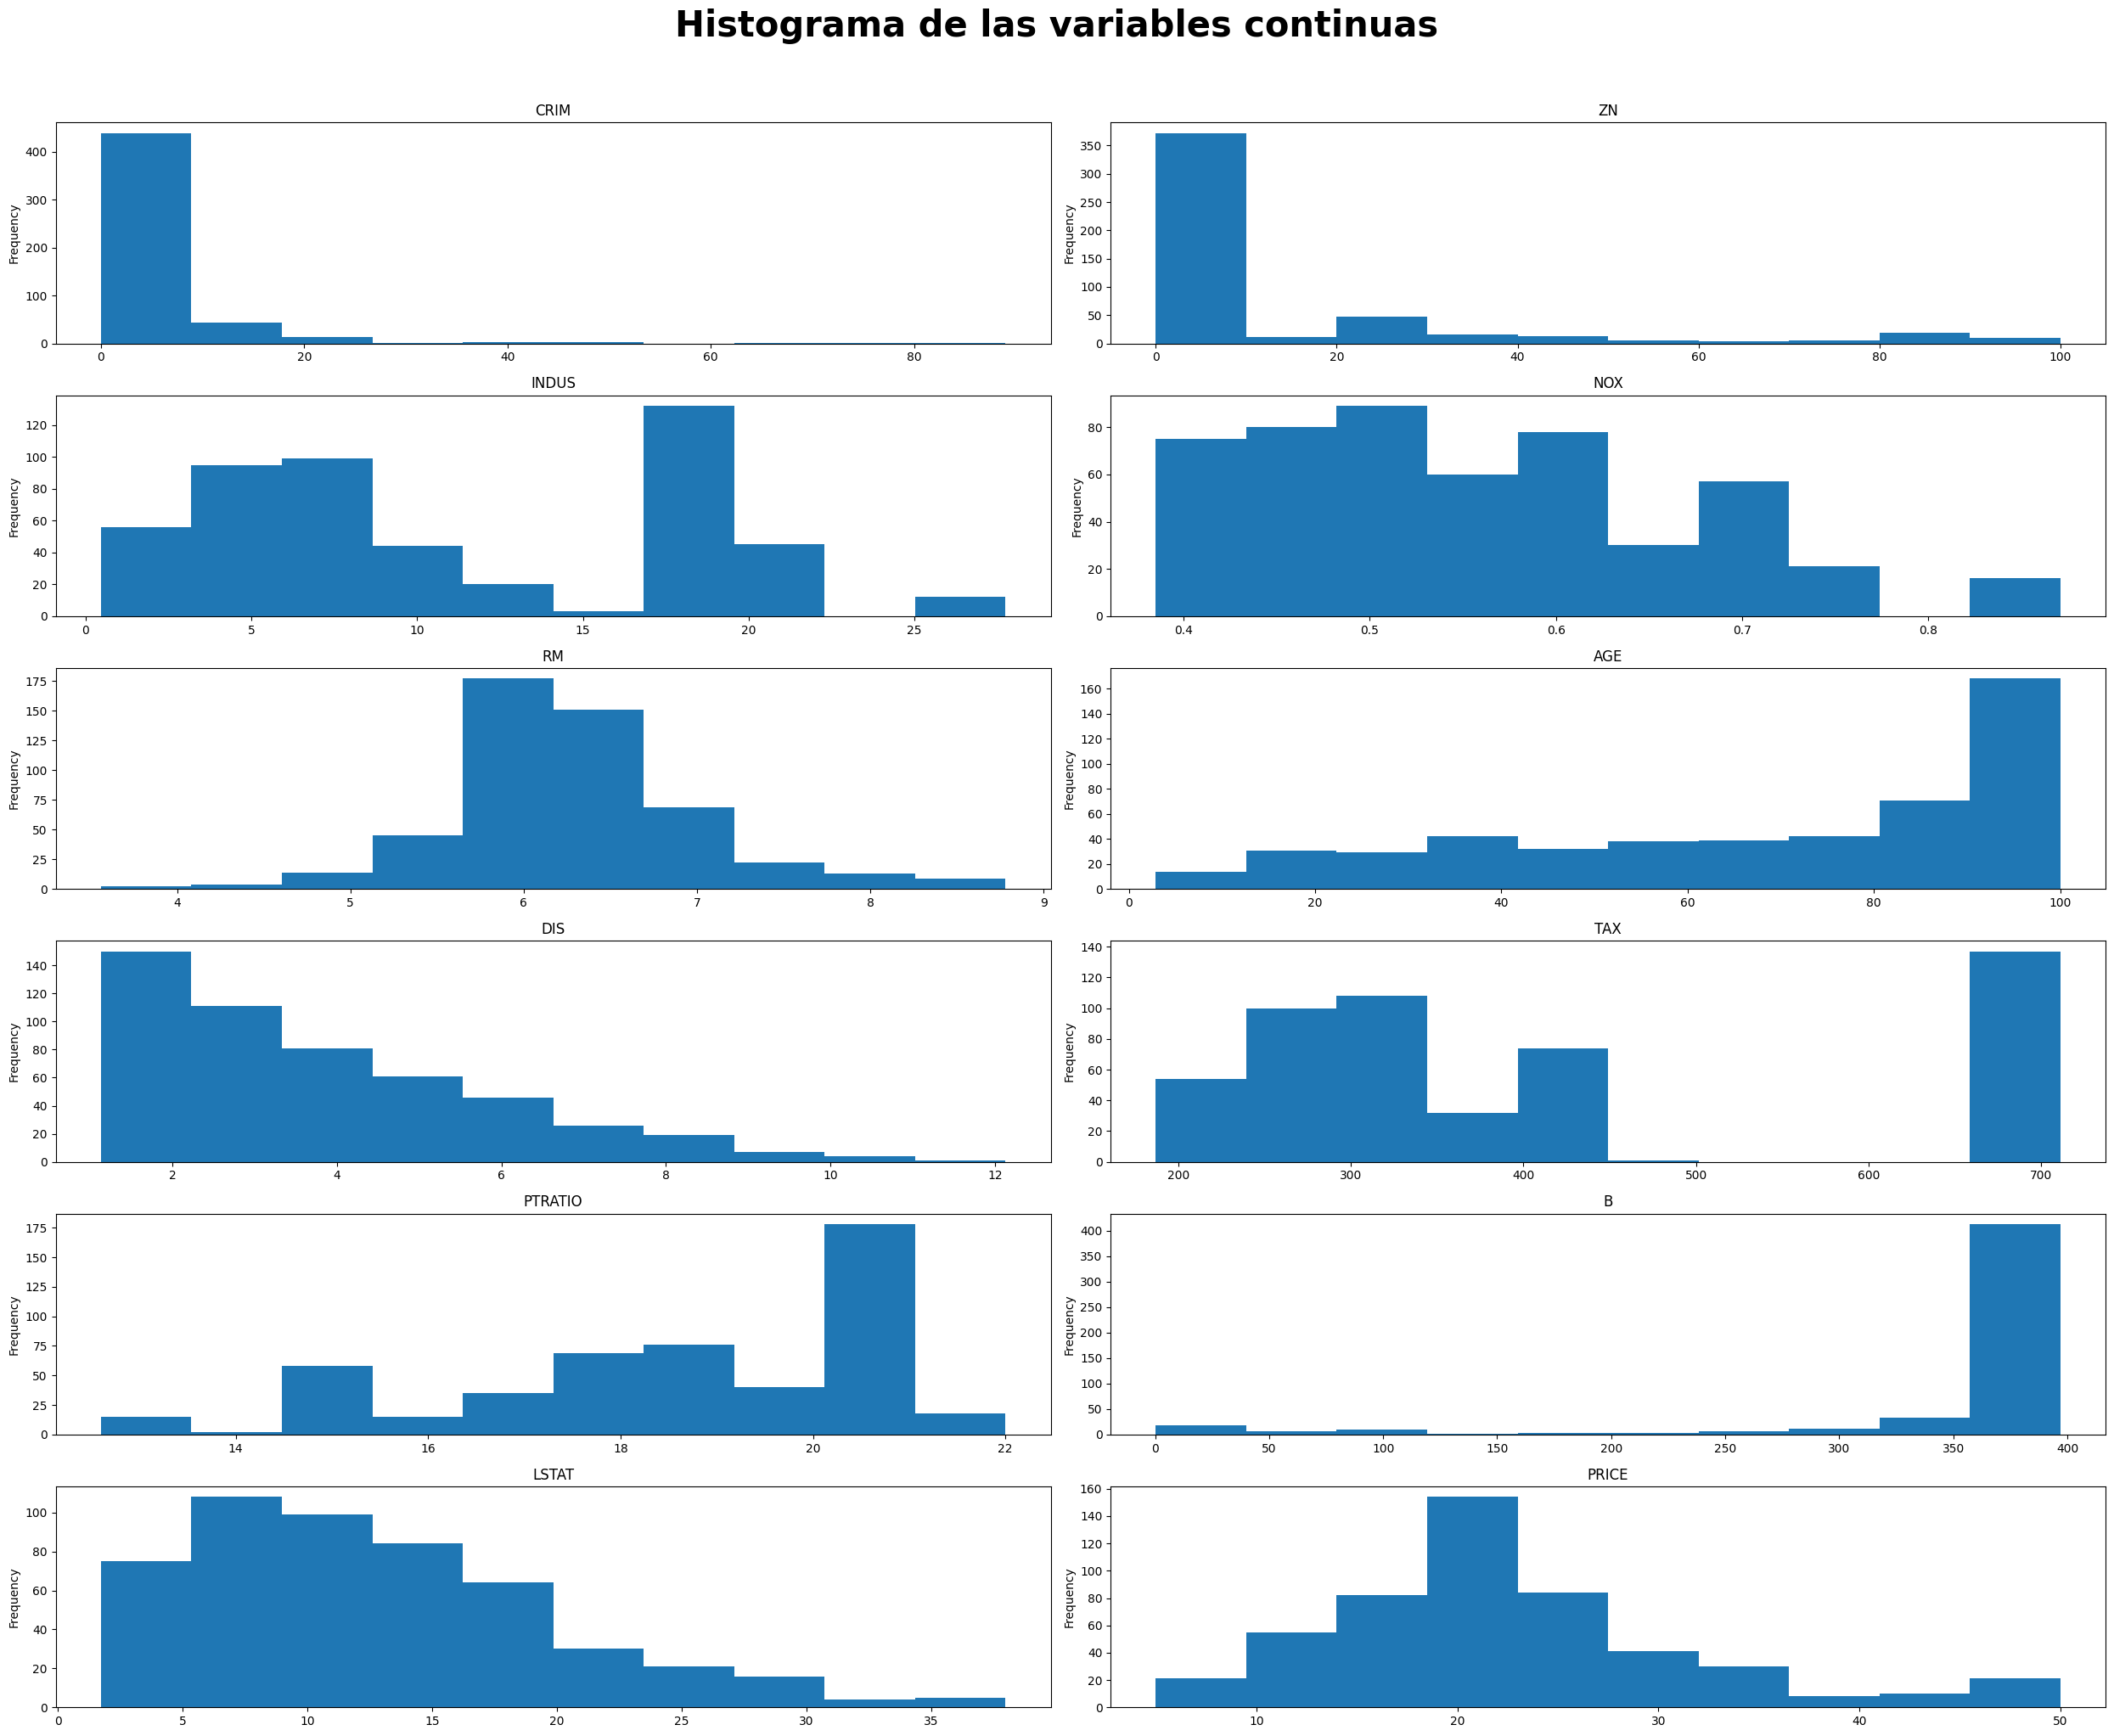

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

# Primero, visualizamos la distribución de las variables continuas mediante histogramas:

# Creamos una figura con 6 filas y 2 columnas de subgráficos, con un tamaño de 15x10 pulgadas
fig, axes = plt.subplots(6, 2, figsize=(25, 20))
# Aplanamos la matriz de subgráficos para facilitar el acceso
axes = axes.flatten()
# Inicializar un índice para recorrer las columnas del DataFrame
ax_idx = 0
# Obtener las columnas del DataFrame, excluyendo las columnas de las varibles que no son continuas (PRICE: variable objetivo, CHAS: variable dummy y RAD: variable categórica)
discrete_vars = ['CHAS', 'RAD']
columns = df.drop(discrete_vars, axis=1).columns
# Iterar a través de las columnas y crear histogramas en cada subgráfico
for col in columns:
    # Crear un histograma para la columna actual en el subgráfico correspondiente
    df[col].plot(kind='hist', ax=axes[ax_idx], title=col)
    # Incrementar el índice para pasar al siguiente subgráfico
    ax_idx += 1
# Agregar un título general para los subgráficos
fig.suptitle('Histograma de las variables continuas', fontsize=30, fontweight='bold', y=1.02)
# Ajustar automáticamente la disposición de los subgráficos para evitar superposiciones
plt.tight_layout()
# Mostrar los subgráficos
plt.show()

Se observa una mayor distribución de valores en las variables INDUS, NOX, AGE, DIS, TAX, PTRATIO, LSTAT y PRICE. Esto es en comparación a las variables CRIM, ZN, cuya mayoría de observaciones está alrededor del 0, y B, cuyos valores están alrededor de 350-400.

#### A continuación, verificamos la asimetría de las variables continuas:
Comprobaremos la asimetría (Skewness) de cada una de las columnas. Para ello, analizaremos la cantidad de asimetría en una característica dada o; en otras palabras, la cantidad de distorsiones de la distribución normal de cada variable continua (excluyendo la variable objetivo PRICE y dummy chas). El pico del histograma representa la moda.

In [6]:
from scipy.stats import skew

for col in df.drop(discrete_vars, axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column CRIM is 5.223148798243851
Skewness for the column ZN is 2.2256663227354307
Skewness for the column INDUS is 0.29502156787351164
Skewness for the column NOX is 0.7293079225348787
Skewness for the column RM is 0.40361213328874385
Skewness for the column AGE is -0.5989626398812962
Skewness for the column DIS is 1.0117805793009007
Skewness for the column TAX is 0.669955941795016
Skewness for the column PTRATIO is -0.8023249268537809
Skewness for the column B is -2.8903737121414492
Skewness for the column LSTAT is 0.9064600935915367
Skewness for the column PRICE is 1.1080984082549072


#### *<span style="color: red;">∴* Comentario:
- Para la columna CRIM, el coeficiente de asimetría (skewness) es 5.223, indicando una fuerte sesgo positivo hacia la derecha. Esto sugiere que la mayoría de los valores están concentrados en el extremo inferior del rango.
- La columna ZN muestra un coeficiente de asimetría de 2.226 aprox, también con un sesgo positivo considerable. Esto implica que hay una concentración de valores en el extremo inferior con algunos valores muy altos que aumentan la asimetría hacia la derecha.
- En contraste, la columna INDUS tiene un coeficiente de asimetría de 0.295, indicando una ligera asimetría positiva. Esto sugiere que la distribución está ligeramente sesgada hacia la derecha, pero de manera menos pronunciada que en las columnas CRIM y ZN.
- La columna NOX tiene un coeficiente de asimetría de 0.729, lo que indica una asimetría positiva moderada.
- La columna RM muestra un coeficiente de asimetría de 0.404, lo que indica una ligera asimetría positiva.
- La columna AGE tiene un coeficiente de asimetría de -0.599, lo que indica una asimetría negativa. Esto sugiere que la distribución está sesgada hacia la izquierda, con más valores concentrados en el extremo superior del rango.
- La columna DIS muestra un coeficiente de asimetría de 1.012, indicando una asimetría positiva moderada.
- La columna TAX tiene un coeficiente de asimetría de 0.670, lo que indica una asimetría positiva moderada.
- La columna PTRATIO muestra un coeficiente de asimetría de -0.802, indicando una asimetría negativa. Esto sugiere que la distribución está sesgada hacia la izquierda, con más valores concentrados en el extremo superior del rango.
- La columna B tiene un coeficiente de asimetría de -2.890, lo que indica una fuerte asimetría negativa. Esto sugiere que la mayoría de los valores están concentrados en el extremo superior del rango y hay algunos valores muy bajos que tiran de la distribución hacia la izquierda.
- La columna LSTAT tiene un coeficiente de asimetría de 0.906, indicando una asimetría positiva considerable.
- Finalmente, la columna PRICE (precio) tiene un coeficiente de asimetría de 1.108, indicando una asimetría positiva considerable

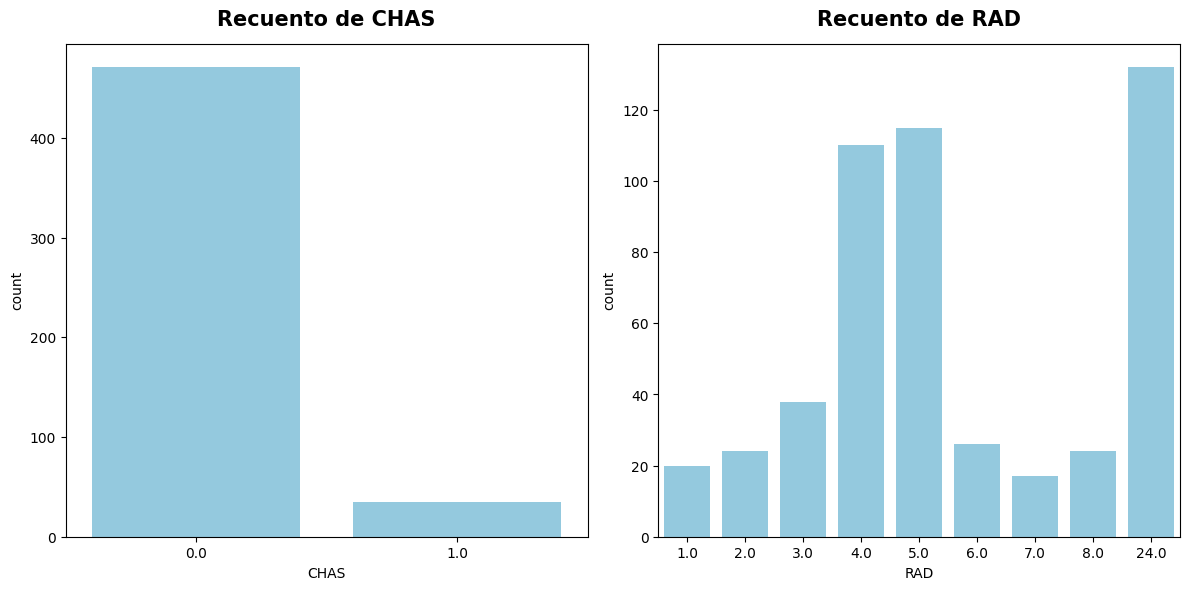

In [7]:
# Segundo, visualizamos los recuentos de frecuencias para la variable discreta CHAS y RAD:
# Identificamos las variables discretas
discrete_vars = ['CHAS', 'RAD']

# Crear gráficos de barras para las variables discretas
plt.figure(figsize=(12,6))
for i, var in enumerate(discrete_vars):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=var, data=df, color='#87CEEB')
    plt.title(f'Recuento de {var}', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#### Por último, comentamos sobre las distribuciones observadas:
El gráfico muestra la distribución de las variables CHAS y RAD en el conjunto de datos.
- El gráfico de la izquierda muestra que la variable CHAS tiene dos valores posibles: 0 y 1. De acuerdo a lo observado, la mayoría no se encuentran en el límite de Charles River(CHAS = 0).
- El gráfico de la derecha muestra que la variable RAD tiene 9 valores posibles. El Índice de accesibilidad a carreteras radiales RAD = 24.0 es las más numerosas, seguida de RAD = 5.0 y RAD = 4.0.

#### d. Utilice boxplots para detectar la presencia de outliers en las variables numéricas. Comente sobre los outliers identificados y decida si deben ser tratados.

Utilizamos boxplots para detectar la presencia de outliers solo en las variables numéricas:

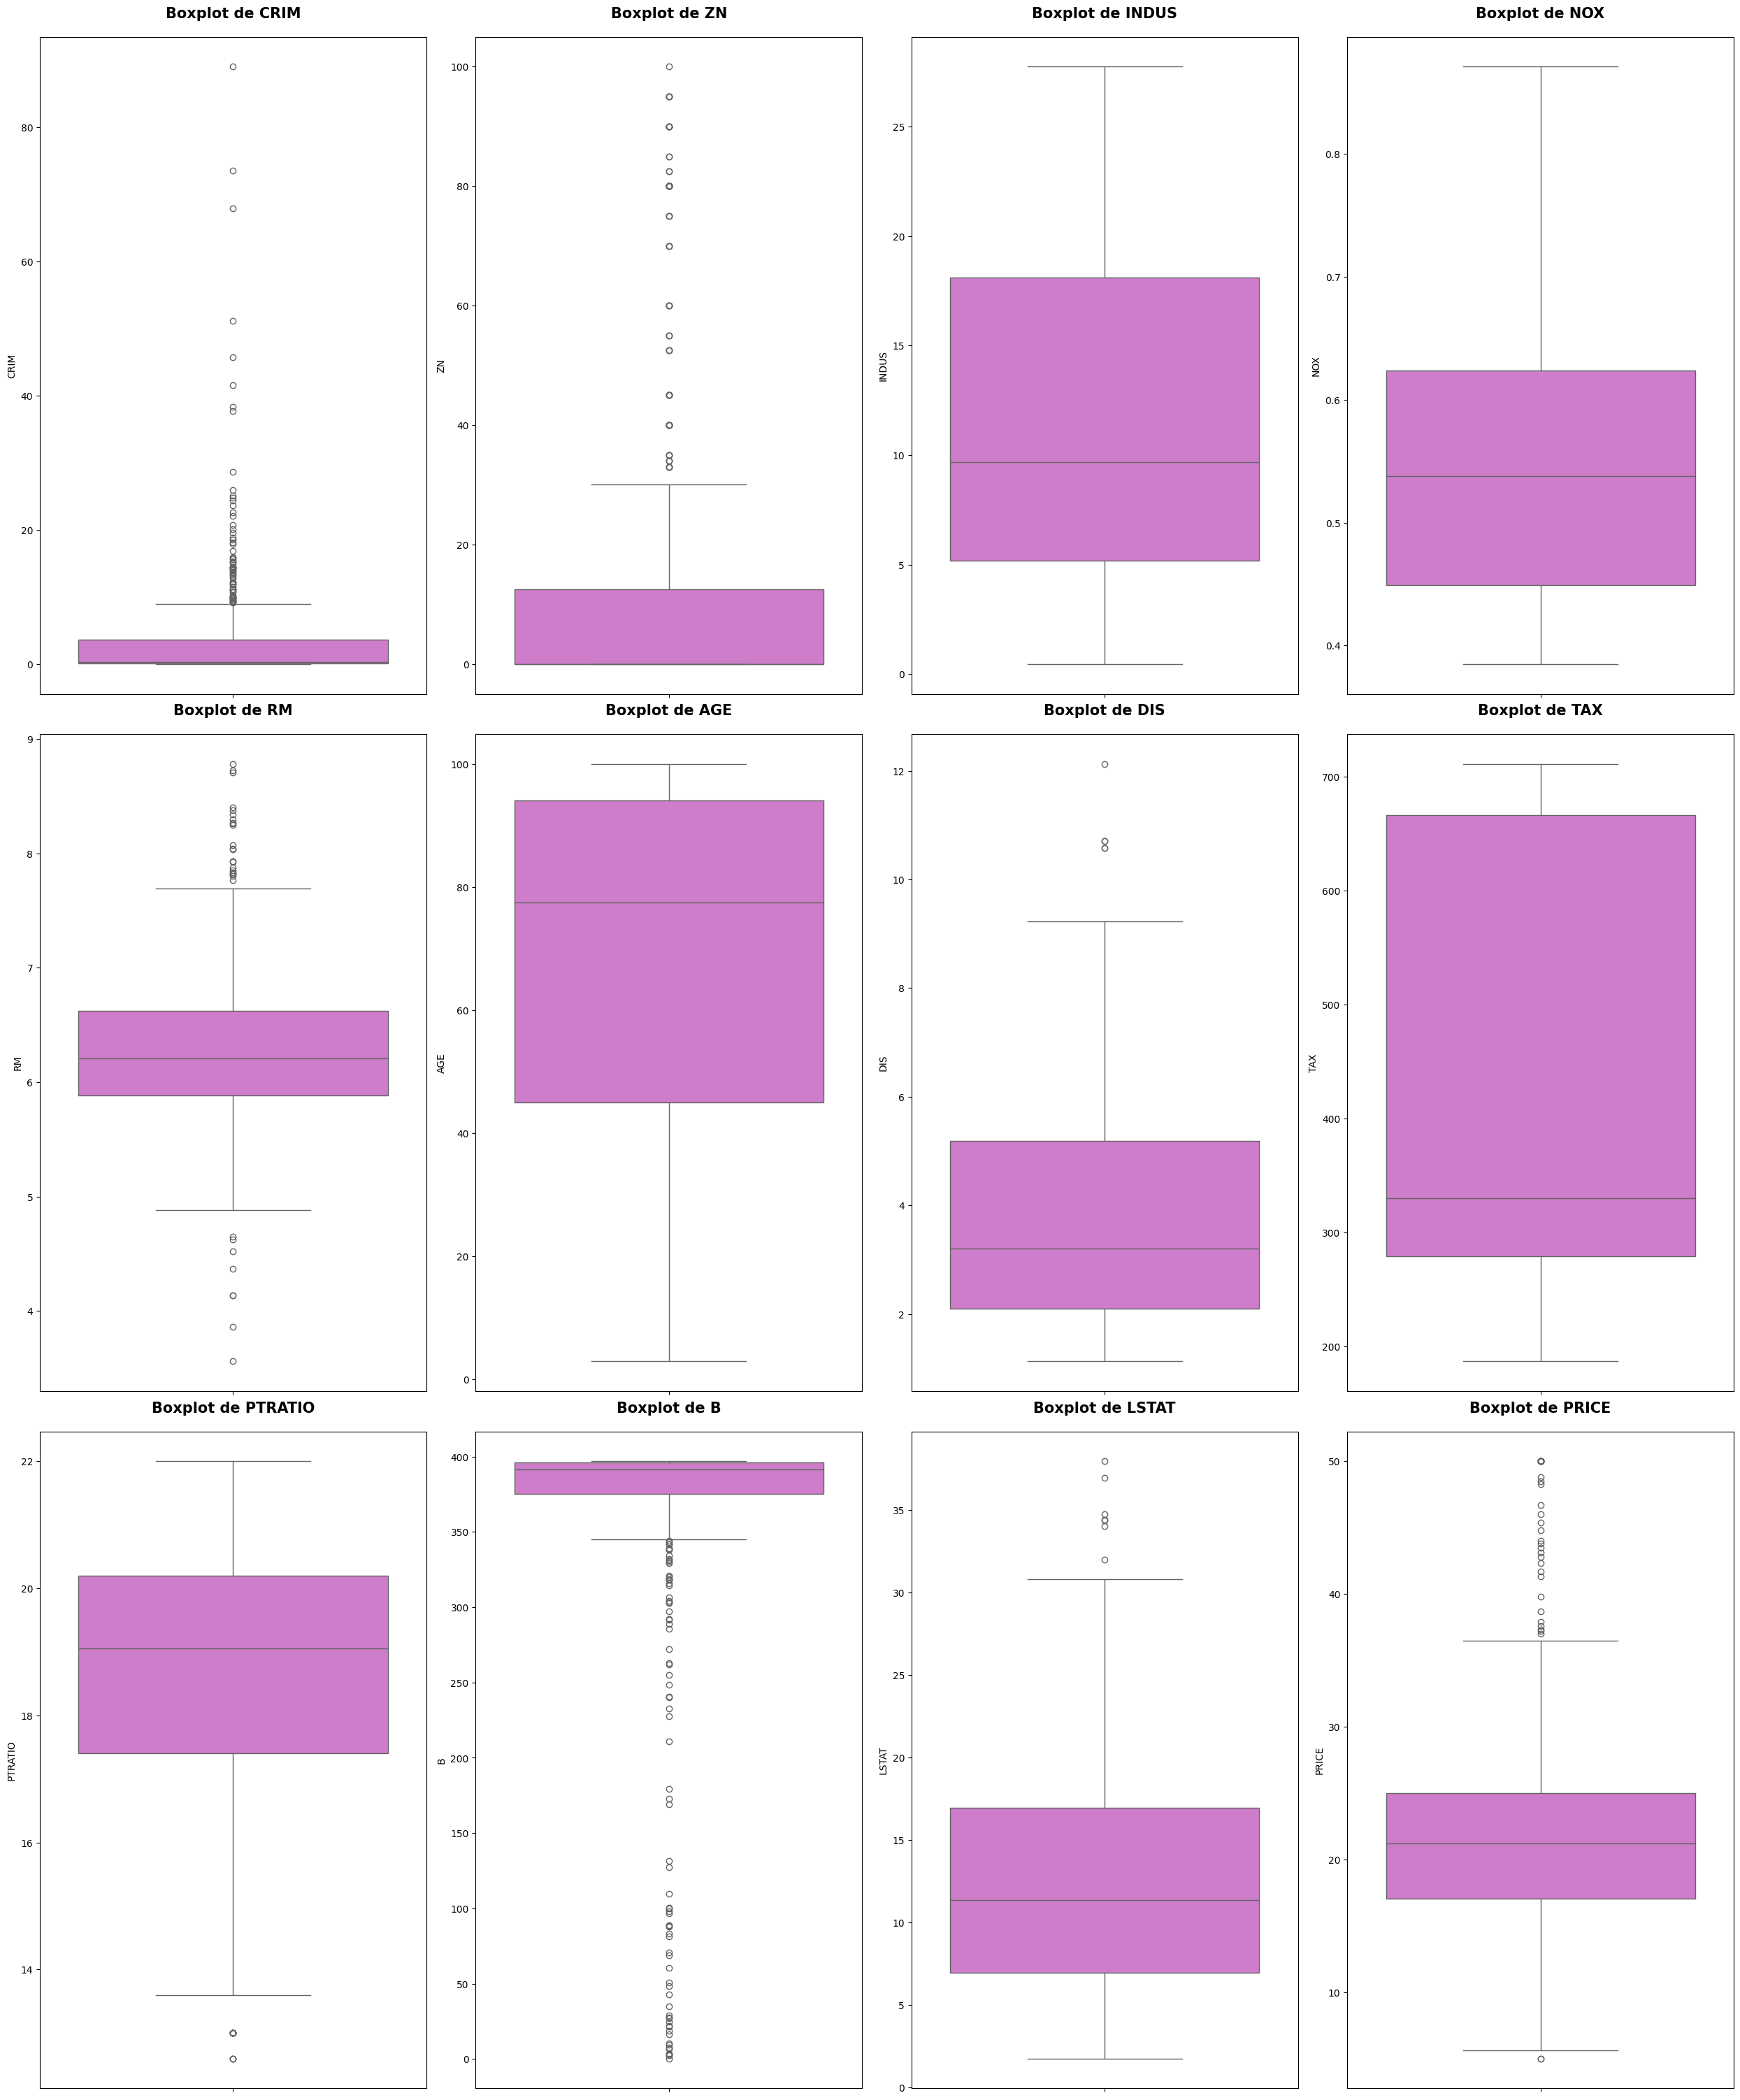

In [8]:
# Primero, creamos los boxplots para detectar la presencia de outliers solo en las variables numéricas:
numeric_vars = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

plt.figure(figsize=(25,40))
for i, var in enumerate (numeric_vars):
        plt.subplot(4, 4, i+1)
        sns.boxplot(y=df[var], color='#DA70D6')
        plt.title(f'Boxplot de {var}', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#### Comentamos los outliers identificamos y decidimos si deben ser tratados:
Se observan outliers en CRIM, ZN, RM, DIS, B, LSTAT y PRICE; no obstante, no deseamos tratarlos, debido a que pueden revelar patrones o relaciones interesantes en los datos que no serían aparentes de otra manera.

#### e. Analice la relación entre las variables mediante una matriz de correlaciones y gráficos de dispersión. Comente sobre las relaciones observadas.

Primero, analizamos la relación entre las variables mediante una matriz de correlaciones

<Axes: title={'center': 'Matriz de correlaciones'}>

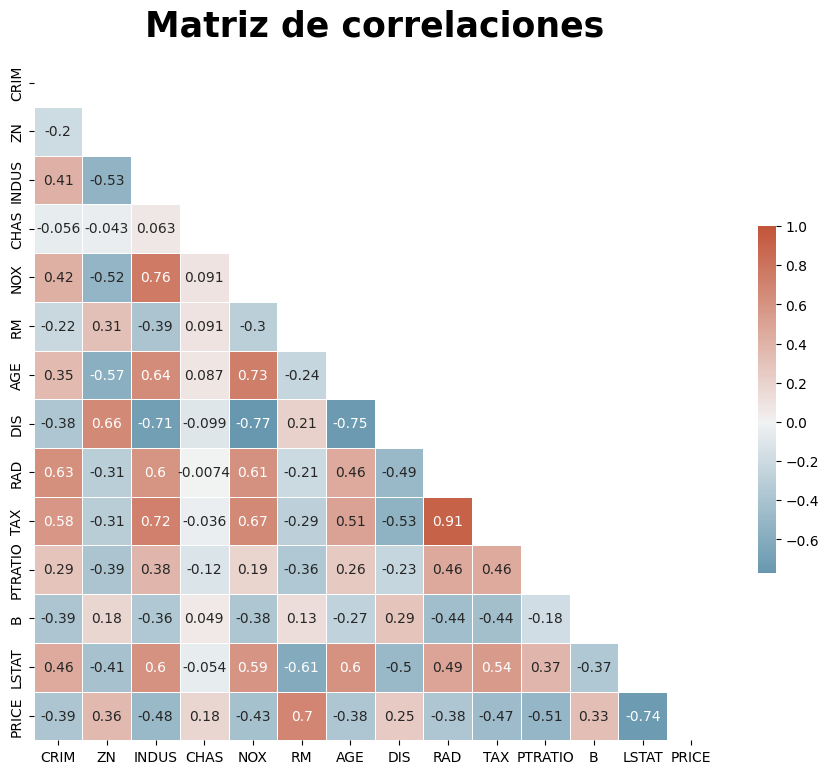

In [9]:
# Mostramos la relación entre las variables mediante una matriz de correlaciones:
# Calcula la matriz de correlación entre las columnas del DataFrame.
corr = df.corr()

# Crea una máscara triangular superior en la matriz de correlación para ocultar los valores duplicados.
mask = np.triu(np.ones_like(corr, dtype=bool))

# Crea una figura para el gráfico de calor de la matriz de correlación.
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Matriz de correlaciones', fontsize=25, fontweight='bold', y=1.02)

# Define una paleta de colores divergentes para el gráfico de calor.
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Trazar un mapa de calor de la matriz de correlación.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Segundo, analizamos la relación entre las variables continuas mediante gráficos de dispersión

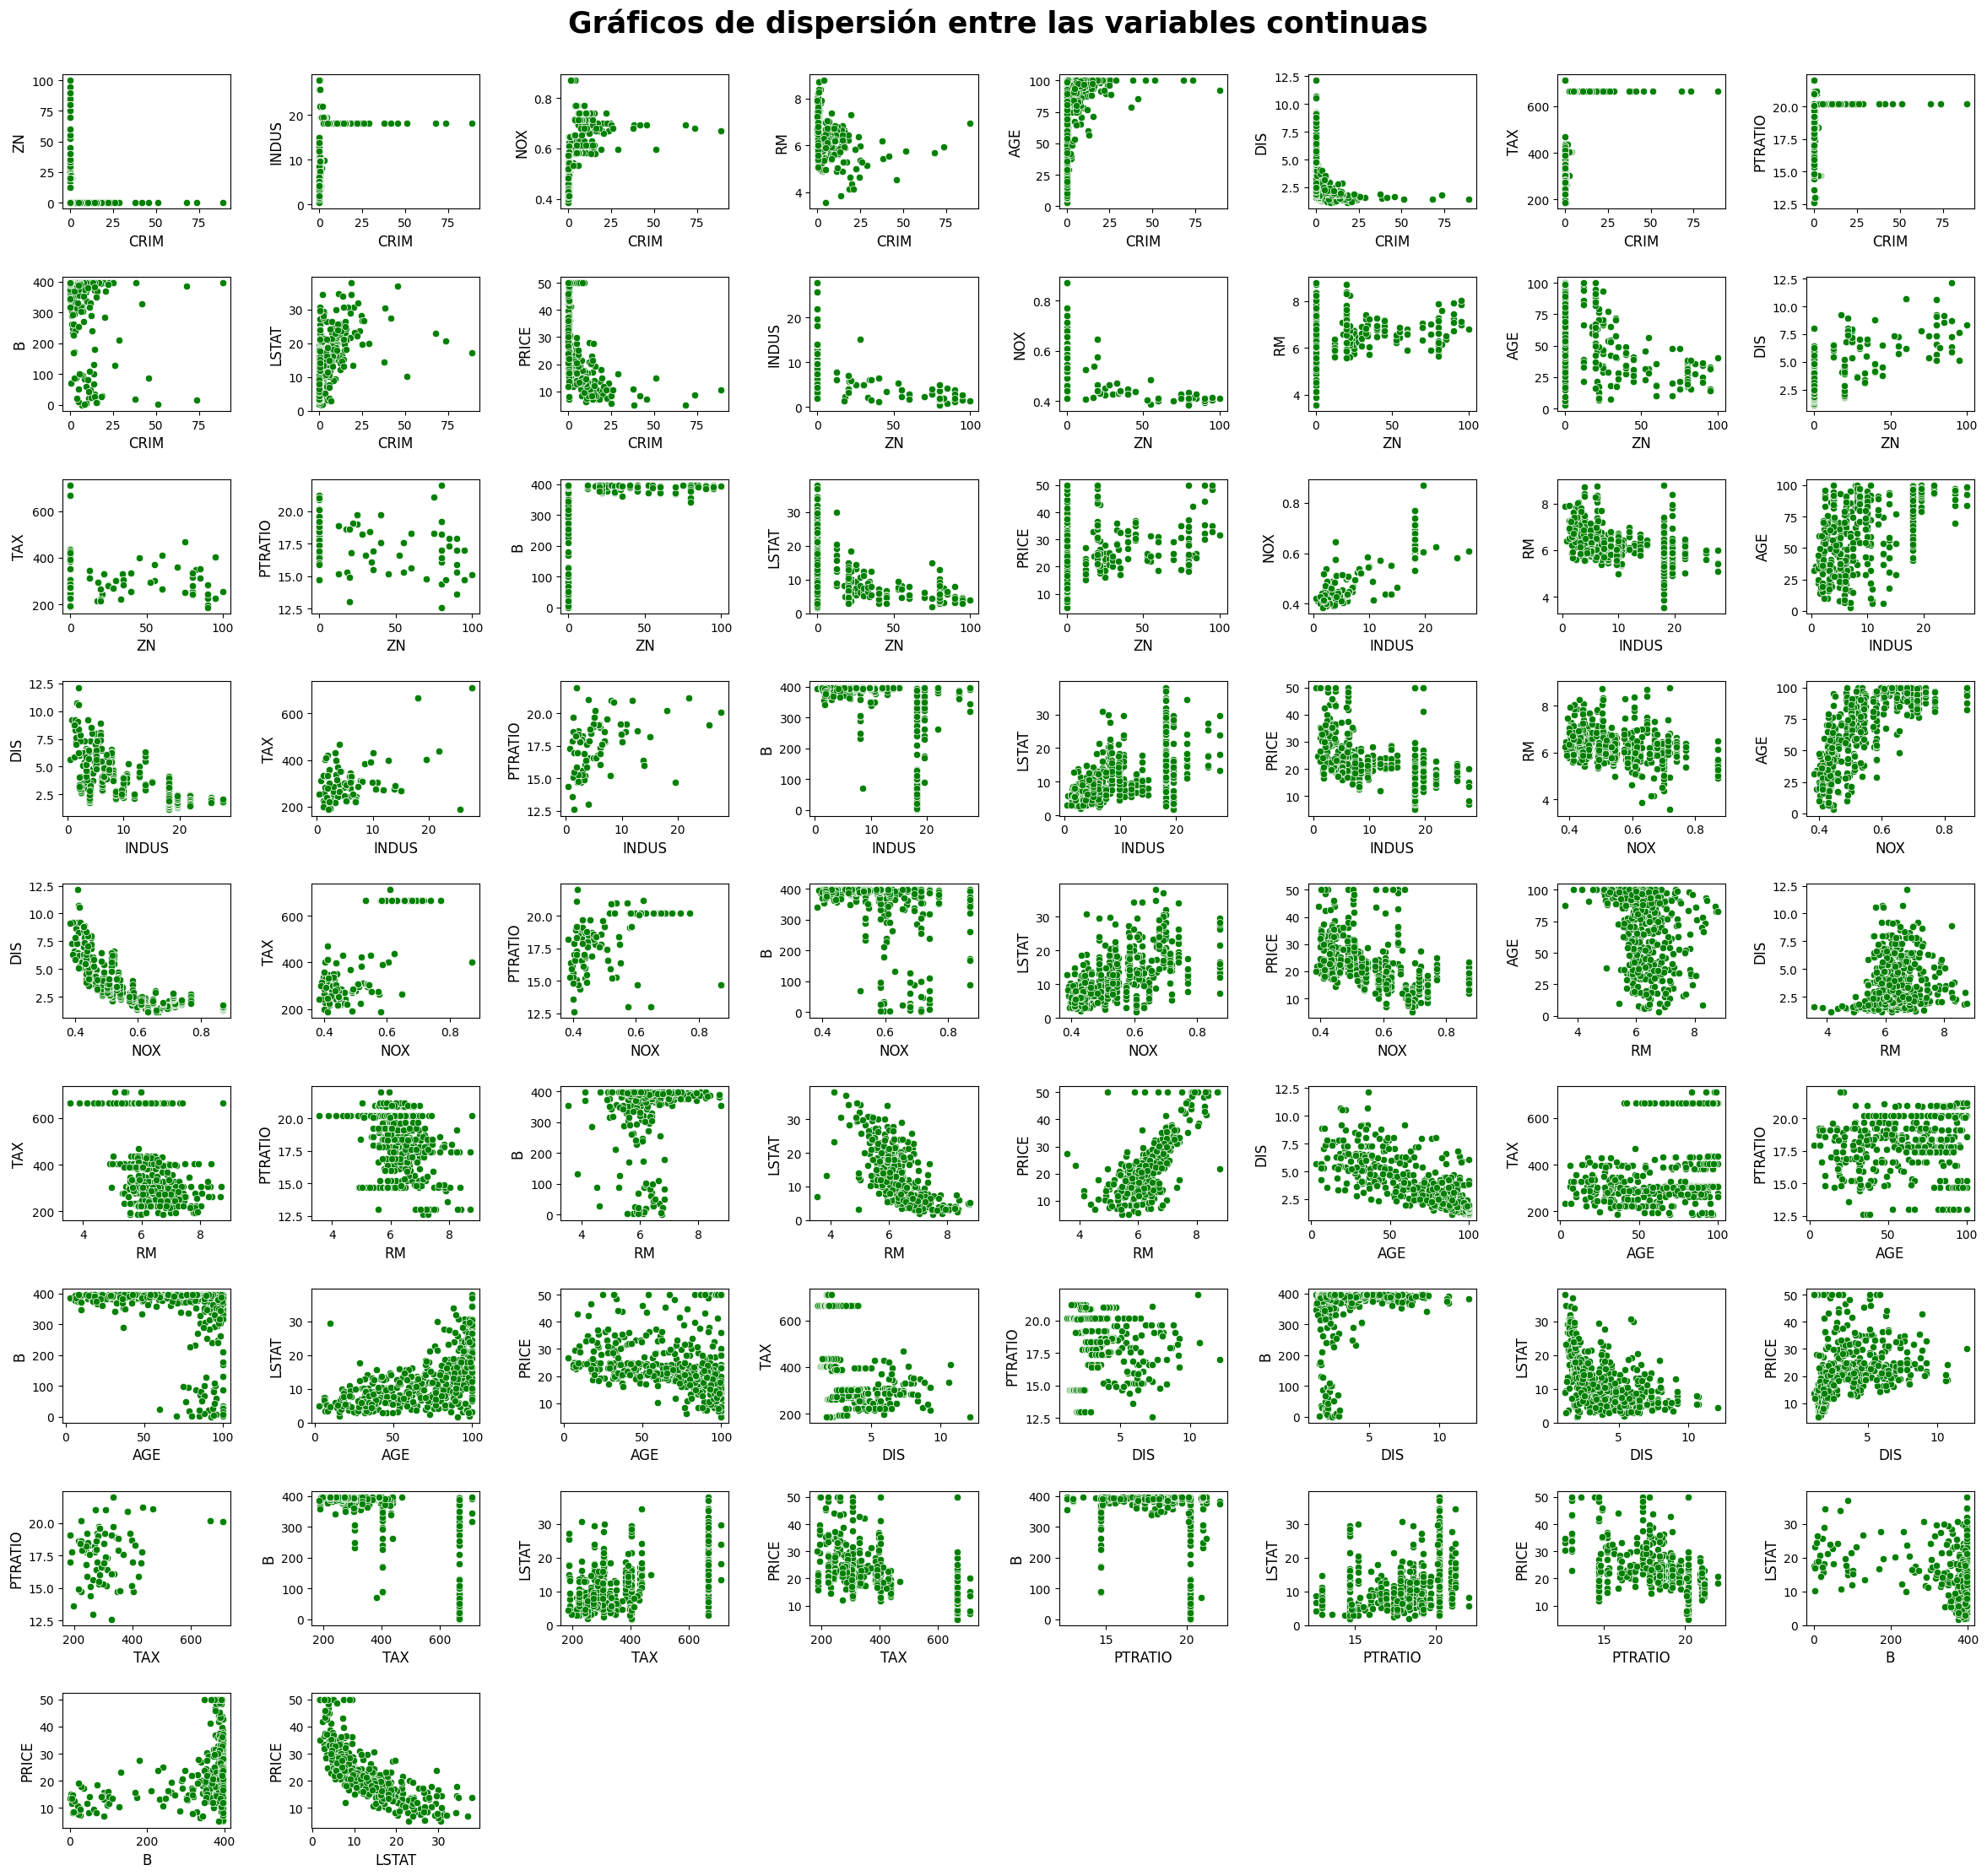

In [10]:
# Creamos los gráficos de disperción entre las variables continuas
fig, axs = plt.subplots(10, 8, figsize=(24, 24))
axs = axs.flatten()

# Lista de variables
numeric_vars_dispersion = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

# Graficos de disperción
index = 0
for i, var1 in enumerate(numeric_vars_dispersion):
    for j, var2 in enumerate(numeric_vars_dispersion):
        if i < j:
            sns.scatterplot(x=df[var1], y=df[var2], data=df, color='green', ax=axs[index])
            axs[index].set_xlabel(var1, fontsize=12)
            axs[index].set_ylabel(var2, fontsize=12)
            axs[index].tick_params(labelsize=10)
            index += 1

plt.tight_layout(pad=2)

# Eliminar subplots vacíos
for ax in axs[index:]:
    fig.delaxes(ax) 

# Titulo 
fig.suptitle('Gráficos de dispersión entre las variables continuas', fontsize=25, fontweight='bold', y=1.02)

# Mostrarlo
plt.show()

#### Por último, comentamos sobre las relaciones observadas:
Podemos destacar que se observan correlaciones positivas entre RM, RAD y TAX con PRICE. Esto indica que las viviendas con más habitaciones (RM), las viviendas ubicadas en zonas con mejor acceso a carreteras (RAD) y la tasa de impuesto a la propiedad (TAX) tienden a ser más caras. Esto es contrario a LSTAT ( Porcentaje de la población de menor estatus), DIS (Distancias ponderadas a cinco centros de empleo en Boston) y NOX (Concentración de óxidos nítricos).
Es preciso destacar que correlación no implica necesariamente causalidad. Es decir, no podemos concluir que una variable causa cambios en otra.


### **<span style="color: turquoise;">Parte 2: Preparación de los datos para estimación de un modelo de regresión**

### **<span style="color: orange;">1.-** Después de completar el análisis exploratorio de datos, proceda a preparar el dataset para el modelado siguiendo estos pasos:

#### a. Convierta las variables categóricas en variables dummy utilizando **<span style="color: yellow;">pd.get_dummies().**

In [11]:
# Identificar las columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print('Columnas categóricas:', categorical_cols)

Columnas categóricas: Index([], dtype='object')


In [12]:
#* Dummy para CHAS
chas_dummies = pd.get_dummies(df['CHAS'], prefix='CHAS')

# Unimos las variable dummy al DataFrame original
df = pd.concat([df, chas_dummies], axis=1)
df.drop('CHAS', axis=1, inplace=True)

# Lista de columnas con tipo de dato no numérico
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Convertirmos cada columna no numérica 
for col in non_numeric_cols:
    df[col] = df[col].astype(int)

print("DataFrame con variables dummy:")
print(df.head())

DataFrame con variables dummy:
      CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  PRICE  CHAS_0.0  CHAS_1.0  
0  396.90   4.98   24.0         1         0  
1  396.90   9.14   21.6         1         0  
2  392.83   4.03   34.7         1         0  
3  394.63   2.94   33.4         1         0  
4  396.90   5.33   36.2         1         0  


In [13]:
#* Dummy para RAD
dummy_rad = pd.get_dummies(df['RAD'].replace({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 24: 1}), prefix='RAD', dtype=int)

# Unir los resultados al DataFrame original
df = pd.concat([df, dummy_rad], axis=1)
df.drop('RAD', axis=1, inplace=True)

# Lista de columnas con tipo de dato no numérico
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Convertir cada columna no numérica 
for col in non_numeric_cols:
    df[col] = df[col].astype(int)

print("DataFrame con variables dummy:")
print(df.head())

DataFrame con variables dummy:
      CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296.0     15.3  396.90   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242.0     17.8  396.90   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242.0     17.8  392.83   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222.0     18.7  394.63   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222.0     18.7  396.90   

   LSTAT  PRICE  CHAS_0.0  CHAS_1.0  RAD_0.0  RAD_1.0  
0   4.98   24.0         1         0        1        0  
1   9.14   21.6         1         0        1        0  
2   4.03   34.7         1         0        1        0  
3   2.94   33.4         1         0        1        0  
4   5.33   36.2         1         0        1        0  


-> Nota: al tener índices de accesibilidad muy bajos, tomaremos como referencia que los valores del 1 al 8 valdrán 0, y 24 tendrá el valor de 1

#### b. Asegúrese de que todas las variables que se introducirán en el modelo sean de formato numérico **<span style="color: yellow;">(int o float).**

In [14]:
#* Nos aseguramos que todas las variables del Datafram sean de formato numérico (int o float):
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

## Convertimos cada columna no numérica 
for col in non_numeric_cols:
    if df[col].dtype == 'object':
        # Columna de tipo objeto (cadena de texto)
        df[col] = df[col].astype('category').cat.codes
    else:
        # Otro tipo de dato no numérico
        df[col] = pd.to_numeric(df[col], errors='coerce')

        
print("Tipos de datos después de la conversión:")
print(df.dtypes)

Tipos de datos después de la conversión:
CRIM        float64
ZN          float64
INDUS       float64
NOX         float64
RM          float64
AGE         float64
DIS         float64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
PRICE       float64
CHAS_0.0      int32
CHAS_1.0      int32
RAD_0.0       int32
RAD_1.0       int32
dtype: object


#### c. **<span style="color: #EFA137;">Opcional**: Crear nuevas características que puedan ser relevantes para el modelo basado en el conocimiento del dominio o análisis exploratorio previo

#### d. Separe el conjunto de datos en *X (características) e y (target)*. Para esta estimación inicial, utilice todas las variables disponibles como características, excepto PRICE, que es la variable objetivo.

In [15]:
# Separamos las características (X) y la variable objetivo "PRICE" (y)
X = df.drop(columns = ['PRICE'], axis=1)
y = df['PRICE']

print("Características (X):")
print(X)

Características (X):
        CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296.0     15.3  396.90   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242.0     17.8  396.90   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242.0     17.8  392.83   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222.0     18.7  394.63   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222.0     18.7  396.90   
..       ...   ...    ...    ...    ...   ...     ...    ...      ...     ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  273.0     21.0  391.99   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  273.0     21.0  396.90   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  273.0     21.0  396.90   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  273.0     21.0  393.45   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  273.0     21.0  396.90   

     L

In [16]:
print("Target (y):")
print(y)

Target (y):
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


#### e. Divida el conjunto de datos en conjuntos de entrenamiento y prueba utilizando **<span style="color: yellow;">train_test_split** de *Scikit-Learn*, con una proporción de *80/20* o *70/30*.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Dividimos los datos en conjunto de entrenamietno y prueba, nuestra división esta al 70/30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Primeras filas de X_train:\n", X_train.head())
print("\nPrimeras filas de X_test:\n", X_test.head())

Primeras filas de X_train:
          CRIM   ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
5     0.02985  0.0   2.18  0.458  6.430  58.7  6.0622  222.0     18.7  394.12   
116   0.13158  0.0  10.01  0.547  6.176  72.5  2.7301  432.0     17.8  393.30   
45    0.17142  0.0   6.91  0.448  5.682  33.8  5.1004  233.0     17.9  396.90   
16    1.05393  0.0   8.14  0.538  5.935  29.3  4.4986  307.0     21.0  386.85   
468  15.57570  0.0  18.10  0.580  5.926  71.0  2.9084  666.0     20.2  368.74   

     LSTAT  CHAS_0.0  CHAS_1.0  RAD_0.0  RAD_1.0  
5     5.21         1         0        1        0  
116  12.04         1         0        1        0  
45   10.21         1         0        1        0  
16    6.58         1         0        1        0  
468  18.13         1         0        0        1  

Primeras filas de X_test:
         CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
173  0.09178   0.0   4.05  0.510  6.416  84.1  2.6463  296.0     16.6 

In [19]:
print("Primeras filas de y_train:\n", y_train.head())
print("\nPrimeras filas de y_test:\n", y_test.head())

Primeras filas de y_train:
 5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: PRICE, dtype: float64

Primeras filas de y_test:
 173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64


### **<span style="color: turquoise;">Parte 3: Estimación de un modelo Lasso para la selección de variables**

### **<span style="color: orange;">1.-** Una ventaja importante del modelo Lasso es su capacidad para seleccionar las características más importantes a partir del valor de los coeficientes.

#### a. Entrene un modelo **<span style="color: olive;">Lasso** utilizando la clase Lasso de Scikit-Learn con un parámetro de penalización **<span style="color: red;">alpha=0.5**.

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np
import pandas as pd

In [21]:
from sklearn.linear_model import Lasso
#* Primero, creamos un modelo Lasso, considerando un parámetro de penalización alpha=0.5
lasso = Lasso(alpha=0.5)

In [22]:
# A continuación, entrenamos el modelo Lasso con los datos de entrenamiento
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [23]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo Lasso
model = Lasso(alpha=0.5, random_state=42)
model.fit(X_train, y_train)

# Predecir sobre los conjuntos de prueba y entrenamiento
test_pred = model.predict(X_test).reshape(-1, 1)
train_pred = model.predict(X_train).reshape(-1, 1)

# Función para imprimir las métricas de evaluación
def print_evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')
    print(f'R^2 Score: {r2:.4f}')

# Evaluación del modelo Lasso en los conjuntos de prueba y entrenamiento
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
Mean Squared Error: 25.13
Root Mean Squared Error: 5.01
R^2 Score: 0.6628
Train set evaluation:
_____________________________________
Mean Squared Error: 25.28
Root Mean Squared Error: 5.03
R^2 Score: 0.7124


#### *  ¿Tiene el modelo un buen rendimiento?
El modelo parece tener un rendimiento razonablemente bueno. El RMSE de alrededor de 5 unidades sugiere que las predicciones no están muy alejadas de los valores reales en la escala original de los datos. Además, el R^2 Score de alrededor del 0.66 indica que el modelo está capturando una proporción significativa de la variabilidad de los datos de prueba.

#### b. Evalúe el modelo utilizando las siguientes métricas: **<span style="color: lightblue;">MAPE (Mean Absolute Percentage Error), MPE (Mean Percentage Error), R², y el porcentaje de observaciones dentro del ±20% del MPE**. *¿Tiene el modelo un buen rendimiento?*

In [24]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np 

# Primero, realizamos predicciones sobre el conjunto de prueba 
y_pred = lasso.predict(X_test)

#* Calculamos el MAPE 
MAPE = mean_absolute_percentage_error(y_test, y_pred)

#* Calculamos el MPE
MPE = np.mean((y_test - y_pred) / y_test) * 100

#* Calculamos R2 
R2 = r2_score(y_test, y_pred)

#* Calculamos el % de observaciones dentro del +- 20% del MPE 
Within_20_mpe = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.2) * 100

print(f"MAPE: {MAPE:.2f}")
print(f"MPE: {MPE:.2f}%")
print(f"R²: {R2:.2f}")
print(f"Porcentaje de observaciones dentro del ±20% del MPE: {Within_20_mpe:.2f}%")

MAPE: 0.18
MPE: -2.31%
R²: 0.66
Porcentaje de observaciones dentro del ±20% del MPE: 67.76%


El modelo parece presentar un buen rendimiento puesto que un valor de 0.66 para el coeficiente de determinación (R²) sugiere que el modelo está explicando una proporción significativa de la variabilidad en los datos, lo cual es positivo. Además, se están realizando predicciones bastante precisas, dado que se tiene un  MAPE del 0.18 y el alto porcentaje de observaciones dentro del ±20% del MPE (67.76%).

#### c. Visualice los coeficientes de las características del modelo **<span style="color: olive;">Lasso**. *¿Todas las variables son relevantes?* Basado en los resultados, decida si mantener todas las características o eliminar las que no sean relevantes.

In [25]:
# Realizamos predicciones sobre el conjunto de prueba
y_pred = lasso.predict(X_test)

# Obtenemos los coeficientes estimados y el intercepto
coeficientes = lasso.coef_
intercepto = lasso.intercept_

print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

Coeficientes: [-8.15734009e-02  3.06643682e-02 -2.15303347e-02 -0.00000000e+00
  2.96085219e+00 -4.00316498e-03 -8.69846755e-01 -9.38912799e-04
 -6.78446377e-01  1.13076308e-02 -6.82071532e-01 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00]
Intercepto: 25.198163163239254


#### * Interpretación:
Basandose en estos resultados, sería apropiado considerar la eliminación de las características con coeficientes cero con el objetivo de simplificar el modelo y reducir la complejidad. No obstante, los mantendremos para poder evaluar los efectos adicionales que genera el considerarlos dentro del modelo.

### **<span style="color: turquoise;">Parte 4: Estimación de un modelo RandomForest**

### **<span style="color: orange;">1.-** Después de seleccionar las variables con Lasso, el siguiente paso es entrenar un modelo Random Forest utilizando las variables seleccionadas.

#### a. Estime un modelo **<span style="color: lightgreen;">Random Forest** y realice la búsqueda de los mejores hiperparámetros para el número de árboles **<span style="color: pink;">(n_estimators)** utilizando **<span style="color: #8726D8;">GridSearchCV**.

In [26]:
# Primero, generamos nuestro modelo Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)

#### b. Utilice los mejores hiperparámetros encontrados para entrenar el modelo **<span style="color: lightgreen;">Random Forest**.

In [27]:
# * Ahora, vamos a realizar la búsqueda de los mejores hiperparámetros para el (n_estimators) utilizando GridSearchCV:
from sklearn.model_selection import GridSearchCV

# Creamos un score personalizado para MAPE
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Definimos el rango de hiperparámetros que queremos probar
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Probamos valores de alpha desde 0.0001 a 1
}

# Configuramos el GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring=mape_scorer, n_jobs=-1)

# Ejecutamos el GridSearchCV para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

# Mejor hiperarámetro
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'n_estimators': 200}


#### c. Evalúe el modelo utilizando las siguientes métricas: **<span style="color: lightblue;">MAPE, MPE, R², y el porcentaje de observaciones dentro del ±20% del MPE**. *¿Tiene el modelo un buen rendimiento? ¿Es mejor que el modelo Lasso entrenado en la parte anterior?*

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Crear y entrenar el modelo RandomForest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular MAPE
MAPE = mean_absolute_percentage_error(y_test, y_pred)

# Calcular MPE
MPE = np.mean((y_test - y_pred) / y_test) * 100

# Calcular R²
R2 = r2_score(y_test, y_pred)

# Calcular el % de observaciones dentro del ±20% del MPE
Within_20_mpe = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.2) * 100

# Imprimir los resultados
print(f"MAPE: {MAPE:.2f}")
print(f"MPE: {MPE:.2f}%")
print(f"R²: {R2:.2f}")
print(f"Porcentaje de observaciones dentro del ±20% del MPE: {Within_20_mpe:.2f}%")

MAPE: 0.11
MPE: -1.47%
R²: 0.87
Porcentaje de observaciones dentro del ±20% del MPE: 87.50%


#### * Interpretación:
El modelo presenta un buen rendimiento. Este aspecto se oberva en el alto R² y el bajo MAPE. Estos indican que el modelo hace predicciones precisas y explica bien la variabilidad en los datos. El sesgo del MPE es relativamente bajo y el porcentaje de predicciones dentro del ±20% del error absoluto es alto, lo cual es un indicativo adicional de la robustez del modelo. En general, estos resultados sugieren que el modelo está bien ajustado.

El modelo Lasso tiene un MAPE: 0.18 y este modelo tiene un MAPE: 0.11. Al compararlos, podemos decir que el modelo Lasso es mejor, dado su mayor valor.

#### d. Utilice **<span style="color: pink;">cross_val_score** para evaluar el modelo en **<span style="color: lightblue;">5 pliegues** y con la **<span style="color: lightblue;">métrica MAPE**. *¿Los resultados muestran que el modelo es robusto?*

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Crear el modelo RandomForest
model = RandomForestRegressor(random_state=42)

# Definir la métrica MAPE como scorer para cross_val_score
scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Realizar cross-validation con 5 pliegues y calcular MAPE
scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)

# Calcular el promedio de los scores (ya que cross_val_score retorna negativos)
mean_mape = np.mean(-scores)

# Imprimir el resultado
print(f"MAPE promedio en 5 pliegues: {mean_mape:.2f}")

# Interpretación
if mean_mape < 1:
    print("Los resultados sugieren que el modelo RandomForest es robusto con respecto a la métrica MAPE.")
else:
    print("Los resultados sugieren que el modelo RandomForest puede no ser tan robusto con respecto a la métrica MAPE.")

MAPE promedio en 5 pliegues: 0.13
Los resultados sugieren que el modelo RandomForest es robusto con respecto a la métrica MAPE.


##### * Interpretación:
Basado en el MAPE promedio en 5 pliegues de 0.13%, podemos concluir que el modelo es robusto. Esto sugiere que las predicciones del modelo son confiables y están bien ajustadas para realizar una predicción del mismo.